<a href="https://colab.research.google.com/github/Ivy1093367/Boyandgirl_predict/blob/main/v1.5_0331_hui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 環境設定&資料集匯入**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
corpus_root = 'drive/My Drive/Colab Notebooks/datasets/'

In [ ]:
train_df = pd.read_csv(corpus_root+'boygirltrain.csv')
test_df = pd.read_csv(corpus_root+'boygirltest.csv')

In [ ]:
train_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,2,處女座,Apple,154.0,43.0,NaN,NaN,583.0,0,Beautiful
1,2,2,處女座,Apple,156.0,47.0,NaN,130.0,NaN,3.5,Enjoying being who I'm notsss
2,3,1,射手座,NaN,170.0,61.0,NaN,90.0,540.0,NaN,Practice Makes perfect
3,4,1,射手座,Apple,170.0,62.0,4.0,100.0,NaN,5,Straightforward
4,5,2,射手座,Android,158.0,67.0,NaN,128.0,320.0,1.2,Humorous
...,...,...,...,...,...,...,...,...,...,...,...
418,419,1,處女座,Android,166.0,66.0,4.0,90.0,1000.0,1,I hope i am a super hero.
419,420,1,牡羊座,Android,176.0,65.0,4.0,87.0,1300.0,2,NaN
420,421,1,NaN,Apple,174.0,72.0,2.0,NaN,2000.0,9,NaN
421,422,2,天蠍座,NaN,167.0,50.0,3.0,180.0,483.0,10,NaN


In [ ]:
test_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,0,天蠍座,Apple,200.0,100.0,1.0,87.0,87.0,87.0,GOod
1,2,0,金牛座,Apple,175.0,80.0,3.0,NaN,2000.0,NaN,Easygoing
2,3,0,雙子座,Apple,155.0,45.0,3.0,150.0,NaN,9.0,NaN
3,4,0,處女座,Apple,173.0,85.0,4.0,NaN,NaN,15.0,NaN
4,5,0,射手座,Android,164.0,57.0,4.0,130.0,505.0,2.0,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...
421,422,0,金牛座,Apple,160.0,70.0,4.0,NaN,500.0,5.0,I am a girl.
422,423,0,天蠍座,Android,162.0,54.0,3.0,180.0,462.0,5.0,NaN
423,424,0,天蠍座,Apple,173.0,66.0,NaN,135.0,102.0,11.1,I like to play basketball.
424,425,0,NaN,NaN,165.0,53.0,NaN,110.0,507.0,416.0,Good


# **2.資料前處理**






<h2>2.1 缺失比例查看

In [ ]:
def check_missing_proportions(df, name="Data"):
    print(f"\n {name} 缺失比例：")
    missing_ratio = df.isnull().mean()  # 每個變數的缺失比例
    overall_missing_ratio = df.isnull().mean().mean()  # 整體缺失比例
    print(missing_ratio)
    print(f"\n整體缺失比例: {overall_missing_ratio:.2%}")

check_missing_proportions(train_df, "訓練集")
check_missing_proportions(test_df, "測試集")


 訓練集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.203310
phone_os      0.184397
height        0.174941
weight        0.200946
sleepiness    0.215130
iq            0.186761
fb_friends    0.182033
yt            0.212766
self_intro    0.245863
dtype: float64

整體缺失比例: 16.42%

 測試集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.190141
phone_os      0.225352
height        0.159624
weight        0.225352
sleepiness    0.169014
iq            0.215962
fb_friends    0.206573
yt            0.183099
self_intro    0.218310
dtype: float64

整體缺失比例: 16.30%


<h2>2.2 刪除欄位

In [ ]:
id_train_backup = train_df['id'].copy()
id_test_backup = test_df['id'].copy()
# 備份 self_intro
self_train_backup = train_df['self_intro'].copy()
self_test_backup = test_df['self_intro'].copy()

# 合併多列的 drop 操作
train_df.drop(columns=["star_sign", "id", "self_intro"], inplace=True)
test_df.drop(columns=["star_sign", "id", "self_intro"], inplace=True)


<h2>2.3 處理特殊值



In [ ]:
print(train_df['phone_os'].unique())

['Apple' nan 'Android' 'Windows Phone' 'JohnCena']


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 合法的手機作業系統
valid_os = ['Apple', 'Android']

# 第一步：直接處理 phone_os，將非法值轉為 'ZZZ'
train_df['phone_os'] = train_df['phone_os'].apply(lambda x: x if x in valid_os else 'ZZZ')
test_df['phone_os'] = test_df['phone_os'].apply(lambda x: x if x in valid_os else 'ZZZ')

# 第二步：Label Encoding（包含 'ZZZ'）
le = LabelEncoder()
le.fit(train_df['phone_os'])

# 建立類別對應編號的查詢表
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("類別對應：", class_mapping)

# 第三步：轉換並將 'ZZZ' 對應的數值先替換為 -1
other_code = class_mapping['ZZZ']
train_df['phone_os'] = train_df['phone_os'].map(lambda x: le.transform([x])[0] if x != 'ZZZ' else -1)
test_df['phone_os'] = test_df['phone_os'].map(lambda x: le.transform([x])[0] if x != 'ZZZ' else -1)

# 第四步：將 phone_os 轉為 int64 型態
train_df['phone_os'] = train_df['phone_os'].astype('int64')
test_df['phone_os'] = test_df['phone_os'].astype('int64')

# 第五步：將 -1 轉回 NaN，並轉為 Int64 型態
train_df['phone_os'] = train_df['phone_os'].replace(-1, np.nan).astype('Int64')
test_df['phone_os'] = test_df['phone_os'].replace(-1, np.nan).astype('Int64')

# 檢查結果
print("最終 phone_os 型態：", train_df['phone_os'].dtype)
print("train_df['phone_os'] 的內容：\n", train_df['phone_os'].head())

類別對應： {'Android': np.int64(0), 'Apple': np.int64(1), 'ZZZ': np.int64(2)}
最終 phone_os 型態： Int64
train_df['phone_os'] 的內容：
 0       1
1       1
2    <NA>
3       1
4       0
Name: phone_os, dtype: Int64


In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,2,1,154.0,43.0,NaN,NaN,583.0,0
1,2,1,156.0,47.0,NaN,130.0,NaN,3.5
2,1,<NA>,170.0,61.0,NaN,90.0,540.0,NaN
3,1,1,170.0,62.0,4.0,100.0,NaN,5
4,2,0,158.0,67.0,NaN,128.0,320.0,1.2
...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4.0,90.0,1000.0,1
419,1,0,176.0,65.0,4.0,87.0,1300.0,2
420,1,1,174.0,72.0,2.0,NaN,2000.0,9
421,2,<NA>,167.0,50.0,3.0,180.0,483.0,10


In [ ]:
train_df['yt'] = pd.to_numeric(train_df['yt'], errors='coerce')  # 非法值轉成 NaN
test_df['yt'] = pd.to_numeric(test_df['yt'], errors='coerce')  # 非法值轉成 NaN

<h2>2.4 檢查fb的資料分布

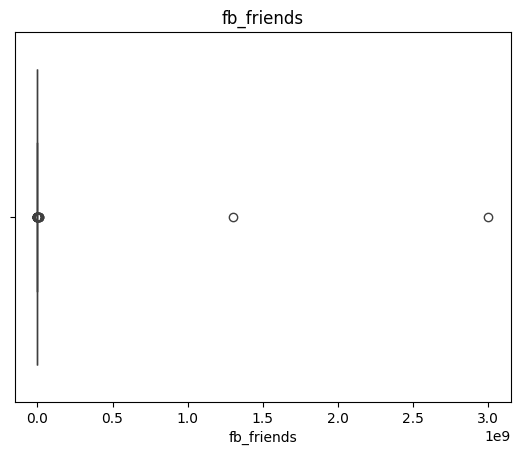

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

In [ ]:
# 刪掉超過某個誇張數值的點，例如 > 100,000
train_df = train_df[train_df['fb_friends'] < 100000]

In [ ]:
train_df.notnull().sum()

,0
gender,339
phone_os,275
height,289
weight,276
sleepiness,273
iq,276
fb_friends,339
yt,266


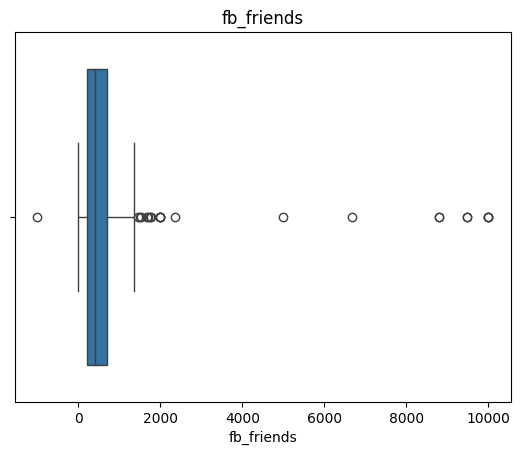

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

In [ ]:
#清理 fb_friends 欄位的異常值
train_df.loc[train_df['fb_friends'] < 0, 'fb_friends'] = np.nan

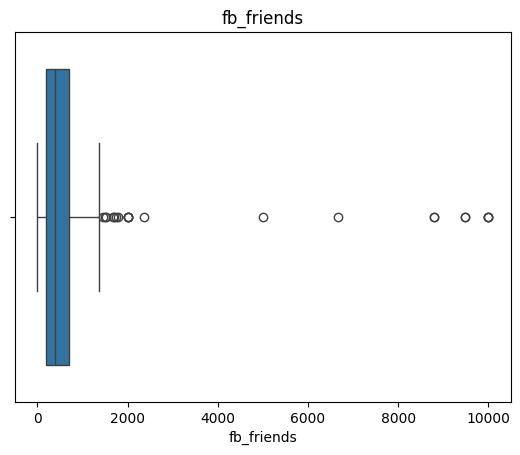

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

<h2>2.5 檢查yt資料分布

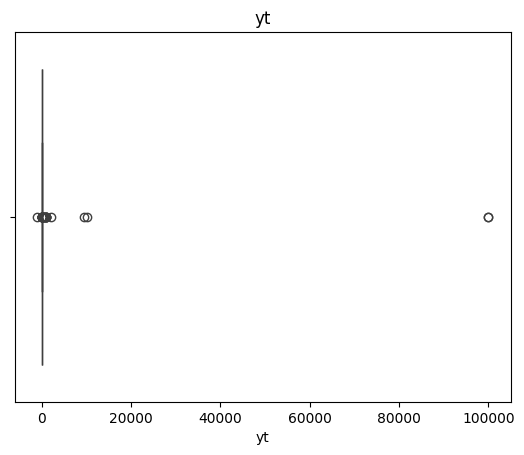

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

In [ ]:
# 刪掉超過某個誇張數值的點，例如 > 20,000、做clip 、log1p處理資料差距
def process_yt_mobile_traffic(df, upper_limit=20000):
    df = df.copy()
    df['is_outlier_yt'] = df['yt'] >= upper_limit
    df['yt'] = df['yt'].clip(upper=upper_limit)
    df['yt'] = np.log1p(df['yt'])
    return df

train_df = process_yt_mobile_traffic(train_df)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# 清理 yt 欄位的異常值
train_df.loc[train_df['yt'] < 0, 'yt'] = np.nan

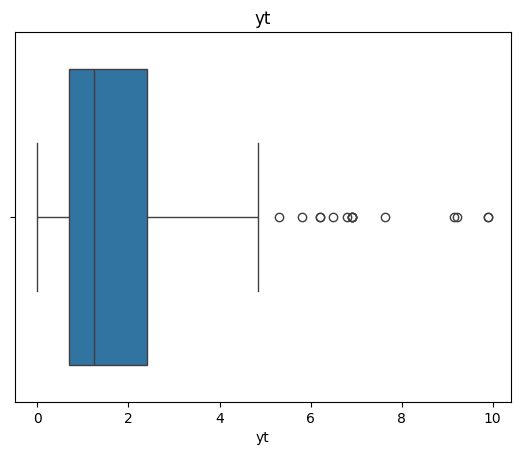

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

<h2>2.6 標記train離群值欄位

In [ ]:
def mark_outliers_iqr(df, columns, k=1.5):
    df_marked = df.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f" {col}: 已標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [ ]:
# 要標記的欄位
target_columns = ['height', 'weight', 'iq', 'fb_friends', 'yt']
#target_columns = ['height', 'weight', 'iq', 'fb_friends']

# 執行標記
train_df = mark_outliers_iqr(train_df, columns=target_columns)

 height: 已標記 61 筆離群值（不在 [148.5, 192.5] 內）
 weight: 已標記 73 筆離群值（不在 [28.0, 100.0] 內）
 iq: 已標記 63 筆離群值（不在 [40.0, 200.0] 內）
 fb_friends: 已標記 22 筆離群值（不在 [-540.62, 1434.38] 內）
 yt: 已標記 89 筆離群值（不在 [-1.86, 4.96] 內）


<h2>2.7 標記test離群值欄位

In [ ]:
def mark_outliers_by_reference(df_target, df_reference, columns, k=1.5):
    df_marked = df_target.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df_reference[col]):
            Q1 = df_reference[col].quantile(0.25)
            Q3 = df_reference[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df_target[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f"【{col}】在 test 中標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [ ]:
test_df = mark_outliers_by_reference(test_df, train_df, columns=target_columns)

【height】在 test 中標記 82 筆離群值（不在 [148.5, 192.5] 內）
【weight】在 test 中標記 107 筆離群值（不在 [28.0, 100.0] 內）
【iq】在 test 中標記 92 筆離群值（不在 [40.0, 200.0] 內）
【fb_friends】在 test 中標記 105 筆離群值（不在 [-540.62, 1434.38] 內）
【yt】在 test 中標記 291 筆離群值（不在 [-1.86, 4.96] 內）


In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends,is_outlier_yt
0,0,1,200.0,100.0,1.0,87.0,87.0,87.0,True,False,False,False,True
1,0,1,175.0,80.0,3.0,NaN,2000.0,NaN,False,False,True,True,True
2,0,1,155.0,45.0,3.0,150.0,NaN,9.0,False,False,False,True,True
3,0,1,173.0,85.0,4.0,NaN,NaN,15.0,False,False,True,True,True
4,0,0,164.0,57.0,4.0,130.0,505.0,2.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,1,160.0,70.0,4.0,NaN,500.0,5.0,False,False,True,False,True
422,0,0,162.0,54.0,3.0,180.0,462.0,5.0,False,False,False,False,True
423,0,1,173.0,66.0,NaN,135.0,102.0,11.1,False,False,False,False,True
424,0,<NA>,165.0,53.0,NaN,110.0,507.0,416.0,False,False,False,False,True


In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends
0,2,1,154.0,43.0,NaN,NaN,583.0,0.000000,False,False,False,True,False
2,1,<NA>,170.0,61.0,NaN,90.0,540.0,NaN,True,False,False,False,False
4,2,0,158.0,67.0,NaN,128.0,320.0,0.788457,False,False,False,False,False
5,2,<NA>,NaN,NaN,3.0,100.0,903.0,1.098612,False,True,True,False,False
6,1,0,NaN,50.0,4.0,115.0,209.0,2.359910,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4.0,90.0,1000.0,0.693147,False,False,False,False,False
419,1,0,176.0,65.0,4.0,87.0,1300.0,1.098612,False,False,False,False,False
420,1,1,174.0,72.0,2.0,NaN,2000.0,2.302585,False,False,False,True,True
421,2,<NA>,167.0,50.0,3.0,180.0,483.0,2.397895,False,False,False,False,False


In [ ]:
# 假設你用 train_df 的欄位順序當標準
column_order = train_df.columns.tolist()

# 讓 test_df 排成一樣的欄位順序
test_df = test_df.loc[:, column_order]

# **3. 缺失值處理**


<h2>3.1 XGBoost填補

In [ ]:
#XGBoost
import xgboost as xgb

def train_xgb_imputer(train_df):
    imputer_models = {}
    for col in train_df.columns:
        known = train_df[train_df[col].notnull()]
        if len(known) > 0:
            model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
            model.fit(known.drop(columns=[col]), known[col])
            imputer_models[col] = model
    return imputer_models

def impute_with_xgb(train_df, test_df, imputer_models):
    df_test_imputed = test_df.copy()
    for col, model in imputer_models.items():
        unknown = df_test_imputed[df_test_imputed[col].isnull()]
        if len(unknown) > 0:
            predictions = model.predict(unknown.drop(columns=[col]))

            # 根據原始資料型態來決定轉換方式
            if pd.api.types.is_integer_dtype(train_df[col]):
                predictions = pd.Series(predictions).round().astype(pd.Int64Dtype()).to_numpy()

            df_test_imputed.loc[df_test_imputed[col].isnull(), col] = predictions

    return df_test_imputed



# 訓練 XGBoost 插補模型
xgb_models = train_xgb_imputer(train_df)

# 使用 XGBoost 模型插補 test_df
# 訓練補值模型
models = train_xgb_imputer(train_df)

# 補 train 自己
train_df = impute_with_xgb(train_df, train_df, models)

# 補 test
test_df = impute_with_xgb(train_df, test_df, models)

In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends
0,2,1,154.000000,43.000000,4.047414,110.373390,583.0,0.000000,False,False,False,True,False
2,1,0,170.000000,61.000000,2.852102,90.000000,540.0,6.753442,True,False,False,False,False
4,2,0,158.000000,67.000000,3.123252,128.000000,320.0,0.788457,False,False,False,False,False
5,2,0,115.802376,79.160461,3.000000,100.000000,903.0,1.098612,False,True,True,False,False
6,1,0,21.035442,50.000000,4.000000,115.000000,209.0,2.359910,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.000000,66.000000,4.000000,90.000000,1000.0,0.693147,False,False,False,False,False
419,1,0,176.000000,65.000000,4.000000,87.000000,1300.0,1.098612,False,False,False,False,False
420,1,1,174.000000,72.000000,2.000000,128.571121,2000.0,2.302585,False,False,False,True,True
421,2,1,167.000000,50.000000,3.000000,180.000000,483.0,2.397895,False,False,False,False,False


In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends
0,0,1,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,True,True,False,False,False
1,0,1,175.0,80.000000,3.000000,149.781342,2000.000000,6.325191,True,False,False,True,True
2,0,1,155.0,45.000000,3.000000,150.000000,2211.355225,9.000000,True,False,False,False,True
3,0,1,173.0,85.000000,4.000000,116.439514,8444.636719,15.000000,True,False,False,True,True
4,0,0,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,1,160.0,70.000000,4.000000,98.029556,500.000000,5.000000,True,False,False,True,False
422,0,0,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,True,False,False,False,False
423,0,1,173.0,66.000000,4.074343,135.000000,102.000000,11.100000,True,False,False,False,False
424,0,1,165.0,53.000000,4.372456,110.000000,507.000000,416.000000,True,False,False,False,False


In [ ]:
test_df.isnull().sum()

,0
gender,0
phone_os,0
height,0
weight,0
sleepiness,0
iq,0
fb_friends,0
yt,0
is_outlier_yt,0
is_outlier_height,0


In [ ]:
train_df.isnull().sum()

,0
gender,0
phone_os,0
height,0
weight,0
sleepiness,0
iq,0
fb_friends,0
yt,0
is_outlier_yt,0
is_outlier_height,0


In [ ]:
test_df['gender'] = test_df['gender'].replace(1, np.nan)
test_df['gender'] = test_df['gender'].replace(2, np.nan)

<h2>3.3 MICE插補

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer_mice = IterativeImputer(max_iter=10, random_state=42)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
train_df[numeric_cols] = imputer_mice.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = imputer_mice.transform(test_df[numeric_cols])

In [ ]:
test_df.isnull().sum()

,0
gender,0
phone_os,0
height,0
weight,0
sleepiness,0
iq,0
fb_friends,0
yt,0
is_outlier_yt,0
is_outlier_height,0


In [ ]:
train_df.isnull().sum()

,0
gender,0
phone_os,0
height,0
weight,0
sleepiness,0
iq,0
fb_friends,0
yt,0
is_outlier_yt,0
is_outlier_height,0


# **4. 編碼文字欄位(self_intro)**


 Categorical Variables Encoding

<h2>4.1 文字前處理

In [ ]:
train_df['self_intro'] = self_train_backup.loc[train_df.index]
test_df['self_intro'] = self_test_backup.loc[test_df.index]

In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends,self_intro
0,2,1,154.000000,43.000000,4.047414,110.373390,583.0,0.000000,False,False,False,True,False,Beautiful
2,1,0,170.000000,61.000000,2.852102,90.000000,540.0,6.753442,True,False,False,False,False,Practice Makes perfect
4,2,0,158.000000,67.000000,3.123252,128.000000,320.0,0.788457,False,False,False,False,False,Humorous
5,2,0,115.802376,79.160461,3.000000,100.000000,903.0,1.098612,False,True,True,False,False,I am cute
6,1,0,21.035442,50.000000,4.000000,115.000000,209.0,2.359910,False,True,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.000000,66.000000,4.000000,90.000000,1000.0,0.693147,False,False,False,False,False,I hope i am a super hero.
419,1,0,176.000000,65.000000,4.000000,87.000000,1300.0,1.098612,False,False,False,False,False,NaN
420,1,1,174.000000,72.000000,2.000000,128.571121,2000.0,2.302585,False,False,False,True,True,NaN
421,2,1,167.000000,50.000000,3.000000,180.000000,483.0,2.397895,False,False,False,False,False,NaN


In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends,self_intro
0,0,1,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,True,True,False,False,False,GOod
1,0,1,175.0,80.000000,3.000000,149.781342,2000.000000,6.325191,True,False,False,True,True,Easygoing
2,0,1,155.0,45.000000,3.000000,150.000000,2211.355225,9.000000,True,False,False,False,True,NaN
3,0,1,173.0,85.000000,4.000000,116.439514,8444.636719,15.000000,True,False,False,True,True,NaN
4,0,0,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,False,False,False,False,False,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,1,160.0,70.000000,4.000000,98.029556,500.000000,5.000000,True,False,False,True,False,I am a girl.
422,0,0,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,True,False,False,False,False,NaN
423,0,1,173.0,66.000000,4.074343,135.000000,102.000000,11.100000,True,False,False,False,False,I like to play basketball.
424,0,1,165.0,53.000000,4.372456,110.000000,507.000000,416.000000,True,False,False,False,False,Good


<h2>4.1 文字前處理

In [72]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# 下載 NLTK 資源（確保包含 punkt_tab）
nltk.download('punkt')        # 基本分詞資源
nltk.download('punkt_tab')    # 新版 NLTK 需要的分詞資源
nltk.download('stopwords')    # 停用詞

# 定義前處理函數
def preprocess_text(text):
    # 轉小寫
    text = text.lower()
    # 分詞
    tokens = word_tokenize(text)
    # 移除停用詞和標點
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # 詞幹提取
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # 合併回字符串
    return ' '.join(tokens)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100)
vectorizer.get_feature_names_out(train_df['self_intro'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 'self_intro'

In [ ]:
train_df['self_intro'] = train_df['self_intro'].fillna('').apply(preprocess_text)
test_df['self_intro'] = test_df['self_intro'].fillna('').apply(preprocess_text)
vectorizer.get_feature_names_out()

<h2>4.2 TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 補空字串
#train_df['self_intro'] = train_df['self_intro'].fillna("")

# 2. 向量轉換
vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = vectorizer.fit_transform(train_df['self_intro'])

# 3. 建立 DataFrame 並保留原 index
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=train_df.index
)

# 4. 合併
train_df = pd.concat([train_df.drop(columns=['self_intro']), tfidf_df], axis=1)


<h2>4.3 WordToVec

In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,...,stay,student,super,takami,tire,wan,wise,work,world,zzzz
0,2,1,154.000000,43.000000,4.047414,110.373390,583.0,0.000000,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,170.000000,61.000000,2.852102,90.000000,540.0,6.753442,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,158.000000,67.000000,3.123252,128.000000,320.0,0.788457,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,0,115.802376,79.160461,3.000000,100.000000,903.0,1.098612,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,0,21.035442,50.000000,4.000000,115.000000,209.0,2.359910,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.000000,66.000000,4.000000,90.000000,1000.0,0.693147,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,1,0,176.000000,65.000000,4.000000,87.000000,1300.0,1.098612,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,1,1,174.000000,72.000000,2.000000,128.571121,2000.0,2.302585,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,2,1,167.000000,50.000000,3.000000,180.000000,483.0,2.397895,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 1. 填補空值（防止 NaN 導致 TF-IDF 出錯）
test_df['self_intro'] = test_df['self_intro'].fillna("")

# 2. 套用已訓練好的 vectorizer（⚠️ 不能再用 fit_transform）
X_test_tfidf = vectorizer.transform(test_df['self_intro'])

# 3. 轉成 DataFrame（⚠️ index 要對齊）
tfidf_test_df = pd.DataFrame(
    X_test_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=test_df.index
)

# 4. 合併進 test_df（移除原本的 self_intro）
test_df = pd.concat([test_df.drop(columns=['self_intro']), tfidf_test_df], axis=1)



In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,...,free - height,height - normal,height / weight,haha - height,fish + height,height_x,sleepiness - weight,brilliant - weight,ABSOLUTE(weight),iq - weight
0,1,1,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,True,True,...,-200.0,200.0,2.000000,-200.0,200.0,200.0,-99.000000,-100.000000,100.000000,-13.000000
1,1,1,175.0,80.000000,3.000000,149.781342,2000.000000,6.325191,True,False,...,-175.0,175.0,2.187500,-175.0,175.0,175.0,-77.000000,-80.000000,80.000000,69.781342
2,2,1,155.0,45.000000,3.000000,150.000000,2211.355225,9.000000,True,False,...,-155.0,155.0,3.444444,-155.0,155.0,155.0,-42.000000,-45.000000,45.000000,105.000000
3,1,1,173.0,85.000000,4.000000,116.439514,8444.636719,15.000000,True,False,...,-173.0,173.0,2.035294,-173.0,173.0,173.0,-81.000000,-85.000000,85.000000,31.439514
4,2,0,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,False,False,...,-164.0,164.0,2.877193,-164.0,164.0,164.0,-53.000000,-57.000000,57.000000,73.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2,1,160.0,70.000000,4.000000,98.029556,500.000000,5.000000,True,False,...,-160.0,160.0,2.285714,-160.0,160.0,160.0,-66.000000,-70.000000,70.000000,28.029556
422,2,0,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,True,False,...,-162.0,162.0,3.000000,-162.0,162.0,162.0,-51.000000,-54.000000,54.000000,126.000000
423,1,1,173.0,66.000000,4.074343,135.000000,102.000000,11.100000,True,False,...,-173.0,173.0,2.621212,-173.0,173.0,173.0,-61.925657,-66.000000,66.000000,69.000000
424,2,1,165.0,53.000000,4.372456,110.000000,507.000000,416.000000,True,False,...,-165.0,165.0,3.113208,-165.0,165.0,165.0,-48.627544,-53.000000,53.000000,57.000000


#  **5. 特徵選取**

In [ ]:
pip install featuretools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 19.4 MB/s eta 0:00:00


In [ ]:
import featuretools as ft
from xgboost import XGBClassifier

train_df['id'] = id_train_backup
test_df['id'] = id_test_backup
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
              'absolute',
              'negate'
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [ ]:
exclude_cols = ['gender', 'phone_os']

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

,gender,phone_os,height_x,weight_x,sleepiness_x,iq_x,fb_friends_x,yt_x,is_outlier_yt_x,is_outlier_height_x,...,wise - work,wise - world,wise - yt,wise - zzzz,work - world,work - yt,work - zzzz,world - yt,world - zzzz,yt - zzzz
0,2,1,154.000000,43.000000,4.047414,110.373390,583.0,0.000000,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,1,0,170.000000,61.000000,2.852102,90.000000,540.0,6.753442,True,False,...,0.0,0.0,-6.753442,0.0,0.0,-6.753442,0.0,-6.753442,0.0,6.753442
2,2,0,158.000000,67.000000,3.123252,128.000000,320.0,0.788457,False,False,...,0.0,0.0,-0.788457,0.0,0.0,-0.788457,0.0,-0.788457,0.0,0.788457
3,2,0,115.802376,79.160461,3.000000,100.000000,903.0,1.098612,False,True,...,0.0,0.0,-1.098612,0.0,0.0,-1.098612,0.0,-1.098612,0.0,1.098612
4,1,0,21.035442,50.000000,4.000000,115.000000,209.0,2.359910,False,True,...,0.0,0.0,-2.359910,0.0,0.0,-2.359910,0.0,-2.359910,0.0,2.359910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1,0,166.000000,66.000000,4.000000,90.000000,1000.0,0.693147,False,False,...,0.0,0.0,-0.693147,0.0,0.0,-0.693147,0.0,-0.693147,0.0,0.693147
335,1,0,176.000000,65.000000,4.000000,87.000000,1300.0,1.098612,False,False,...,0.0,0.0,-1.098612,0.0,0.0,-1.098612,0.0,-1.098612,0.0,1.098612
336,1,1,174.000000,72.000000,2.000000,128.571121,2000.0,2.302585,False,False,...,0.0,0.0,-2.302585,0.0,0.0,-2.302585,0.0,-2.302585,0.0,2.302585
337,2,1,167.000000,50.000000,3.000000,180.000000,483.0,2.397895,False,False,...,0.0,0.0,-2.397895,0.0,0.0,-2.397895,0.0,-2.397895,0.0,2.397895


In [ ]:
# 目標欄位
target_col = 'gender'

# 特徵與標籤
X = train_df_combined.drop(columns=['id', 'gender'])
y = train_df_combined['gender'].map({1: 0, 2: 1})  # 不動原始欄位

# ✅ 清理 inf / NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))
X = X.clip(lower=-1e6, upper=1e6)  # 可選：限制極端值

# 建立模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X, y)


# 特徵重要性對應每個欄位
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# 排序（由高到低）
feature_importances = feature_importances.sort_values(ascending=False)

# 顯示前 20 名最重要的特徵
print("Top 10 重要特徵：")
print(feature_importances.head(10))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 重要特徵：
free - height          0.344794
height - normal        0.097205
height / weight        0.041582
haha - height          0.037978
fish + height          0.030567
height_x               0.025104
sleepiness - weight    0.023967
brilliant - weight     0.023861
ABSOLUTE(weight)       0.022490
iq - weight            0.019918
dtype: float32


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas

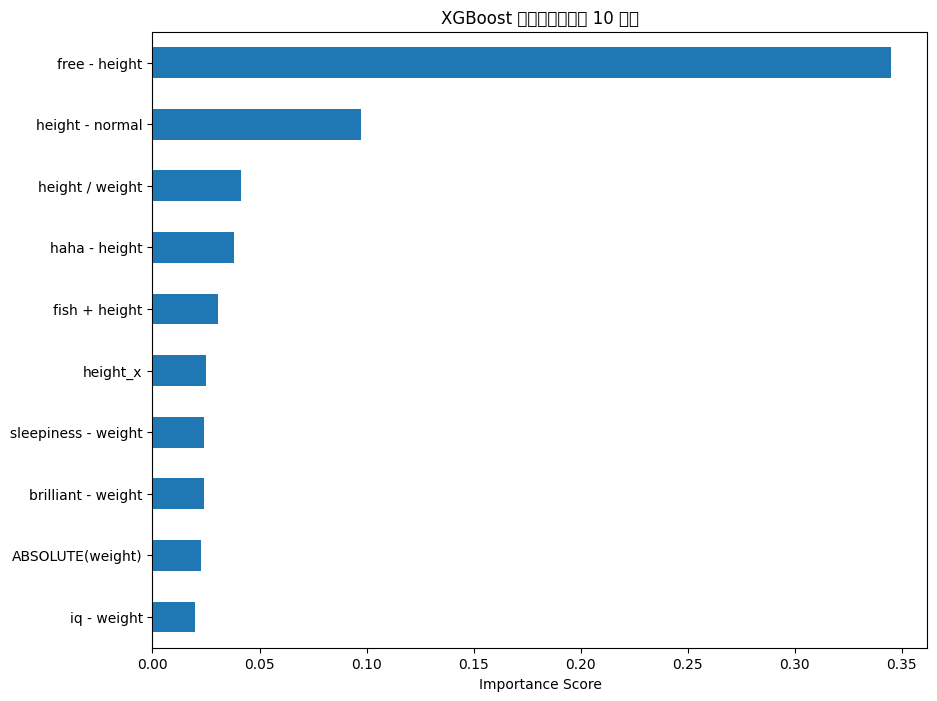

In [ ]:
import matplotlib.pyplot as plt

feature_importances.head(10).plot(kind='barh', figsize=(10, 8))
plt.title("XGBoost 特徵重要性（前 10 名）")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()

In [ ]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = train_df_combined[['id'] + top_10_features]
test_top_features = test_df_combined[['id'] + top_10_features]

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

# **6.資料不平衡處理**


In [ ]:
print(train_df['gender'].value_counts(normalize=True))

gender
1    0.758112
2    0.241888
Name: proportion, dtype: float64


In [ ]:
pip install imbalanced-learn

<h2>6.1 SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# 定義 SMOTE 處理函數
def apply_smote(X, y, random_state=42):
    # 處理無窮大和 NaN
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median(numeric_only=True))
    # 標籤轉為 0 和 1
    y_encoded = y - 1 # gender: 1/2 → 0/1
    # SMOTE 重抽樣
    smote = SMOTE(random_state=random_state)
    X_smote, y_smote = smote.fit_resample(X, y_encoded)
    print("SMOTE 後分佈：", Counter(y_smote))
    return X_smote, y_smote


# 特徵與標籤切分
X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']
X_smote, y_smote = apply_smote(X, y, random_state=42)

SMOTE 後分佈： Counter({1: 257, 0: 257})


# **7. 預測分類模型**


In [ ]:
# 定義數據清理函數
def clean_data(X, reference_df=None):
    """
    清理數據中的無窮大和 NaN 值。

    參數:
    - X: 要清理的數據
    - reference_df: 用於填充 NaN 的參考數據（可選）
    """
    X_clean = X.copy()
    for col in X_clean.columns:
        X_clean[col] = pd.to_numeric(X_clean[col], errors='coerce')  # 轉為數值，無效值變 NaN
        # 如果有參考數據，使用其中位數填充；否則用自身中位數
        fill_value = reference_df[col].median() if reference_df is not None else X_clean[col].median()
        X_clean[col] = X_clean[col].replace([np.inf, -np.inf], np.nan).fillna(fill_value)
        X_clean[col] = X_clean[col].clip(lower=-1e38, upper=1e38)  # 限制值範圍
    return X_clean

<h2> 7.1 XGBOOST

(討論)ValueError: Invalid classes inferred from unique values of y.  Expected: [0 1], got [1 2]

In [ ]:
from xgboost import XGBClassifier
#  建立模型
xg_clf = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
#    scale_pos_weight=2.04,  # 調整少數類權重
    eval_metric='logloss',
    random_state=42
)

'''
# 模型訓練
xg_clf.fit(X_smote, y_smote)

# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = xg_clf.predict(X_test) + 1
'''

"\n# 模型訓練\nxg_clf.fit(X_smote, y_smote)\n\n# 預測：X_test 的準備記得也要和 train_df 的欄位一致\nX_test = test_df.drop(columns=['gender']).astype(float)\n\n# 預測結果：轉回原本的 1/2 標籤\ny_test_pred = xg_clf.predict(X_test) + 1\n"

In [ ]:
print("Train 欄位缺失情況：")
print(train_df.isna().sum())

print("\nTest 欄位缺失情況：")
print(test_df.isna().sum())

Train 欄位缺失情況：
gender         0
phone_os      64
height        50
weight        63
sleepiness    66
              ..
with           0
work           0
world          0
you            0
zzzz           0
Length: 111, dtype: int64

Test 欄位缺失情況：
gender         0
phone_os      98
height        68
weight        96
sleepiness    72
              ..
with           0
work           0
world          0
you            0
zzzz           0
Length: 111, dtype: int64


<h2>7.2 Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
rf_clf = RandomForestClassifier(
    n_estimators=200,      # 增加樹的數量以提升穩定性，RF 通常受益於更多樹
    max_depth=10,          # 稍微增加深度，RF 不易過擬合，可適當放寬
#    class_weight='balanced',
    min_samples_split=5,   # 控制每個節點分裂的最小樣本數，減少過擬合
    min_samples_leaf=2,    # 葉節點最小樣本數，提升模型泛化能力
    max_features='sqrt',   # 特徵子集選擇，RF 常用 sqrt 提升多樣性
    criterion='gini',      # 使用基尼係數，RF 中常見且計算效率高
    random_state=42,       # 保持隨機種子一致性
    n_jobs=-1              # 使用所有可用 CPU 核心加速訓練
)

# 模型訓練
rf_clf.fit(X_smote, y_smote)


# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)
X_test = clean_data(X_test)

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = rf_clf.predict(X_test)+1

In [ ]:
test_df['gender'] = y_test_pred

In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,...,free - height,height - normal,height / weight,haha - height,fish + height,height_x,sleepiness - weight,brilliant - weight,ABSOLUTE(weight),iq - weight
0,1,1,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,True,True,...,-200.0,200.0,2.000000,-200.0,200.0,200.0,-99.000000,-100.000000,100.000000,-13.000000
1,1,1,175.0,80.000000,3.000000,149.781342,2000.000000,6.325191,True,False,...,-175.0,175.0,2.187500,-175.0,175.0,175.0,-77.000000,-80.000000,80.000000,69.781342
2,2,1,155.0,45.000000,3.000000,150.000000,2211.355225,9.000000,True,False,...,-155.0,155.0,3.444444,-155.0,155.0,155.0,-42.000000,-45.000000,45.000000,105.000000
3,1,1,173.0,85.000000,4.000000,116.439514,8444.636719,15.000000,True,False,...,-173.0,173.0,2.035294,-173.0,173.0,173.0,-81.000000,-85.000000,85.000000,31.439514
4,2,0,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,False,False,...,-164.0,164.0,2.877193,-164.0,164.0,164.0,-53.000000,-57.000000,57.000000,73.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2,1,160.0,70.000000,4.000000,98.029556,500.000000,5.000000,True,False,...,-160.0,160.0,2.285714,-160.0,160.0,160.0,-66.000000,-70.000000,70.000000,28.029556
422,2,0,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,True,False,...,-162.0,162.0,3.000000,-162.0,162.0,162.0,-51.000000,-54.000000,54.000000,126.000000
423,1,1,173.0,66.000000,4.074343,135.000000,102.000000,11.100000,True,False,...,-173.0,173.0,2.621212,-173.0,173.0,173.0,-61.925657,-66.000000,66.000000,69.000000
424,2,1,165.0,53.000000,4.372456,110.000000,507.000000,416.000000,True,False,...,-165.0,165.0,3.113208,-165.0,165.0,165.0,-48.627544,-53.000000,53.000000,57.000000


In [ ]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

,count
gender,
1,294
2,132


<h2> 7.3 Light GBM

In [ ]:
from lightgbm import LGBMClassifier
import warnings
lgb_base = LGBMClassifier(
    n_estimators=100,      # 比 RF 少一點，避免過擬合
    max_depth=7,           # 稍淺，控制模型複雜度
    min_child_samples=5,   # 類似 min_samples_leaf，增強泛化
    learning_rate=0.1,     # 適中的學習率
    num_leaves=20,         # 控制每棵樹的葉子數，小數據集不宜過多
    random_state=42,
    n_jobs=-1
)
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=UserWarning)  # 忽略特定警告
  lgb_base.fit(X_smote, y_smote)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 257, number of negative: 257
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2951
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<h2> 7.4 Stack

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf', rf_clf),
    ('xgb', xg_clf)
]
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
# 模型訓練
stack_clf.fit(X_smote, y_smote)

# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)
X_test = clean_data(X_test)

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = stack_clf.predict(X_test) + 1

In [ ]:
test_df['gender'] = y_test_pred
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,...,free - height,height - normal,height / weight,haha - height,fish + height,height_x,sleepiness - weight,brilliant - weight,ABSOLUTE(weight),iq - weight
0,1,1,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,True,True,...,-200.0,200.0,2.000000,-200.0,200.0,200.0,-99.000000,-100.000000,100.000000,-13.000000
1,1,1,175.0,80.000000,3.000000,149.781342,2000.000000,6.325191,True,False,...,-175.0,175.0,2.187500,-175.0,175.0,175.0,-77.000000,-80.000000,80.000000,69.781342
2,2,1,155.0,45.000000,3.000000,150.000000,2211.355225,9.000000,True,False,...,-155.0,155.0,3.444444,-155.0,155.0,155.0,-42.000000,-45.000000,45.000000,105.000000
3,1,1,173.0,85.000000,4.000000,116.439514,8444.636719,15.000000,True,False,...,-173.0,173.0,2.035294,-173.0,173.0,173.0,-81.000000,-85.000000,85.000000,31.439514
4,2,0,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,False,False,...,-164.0,164.0,2.877193,-164.0,164.0,164.0,-53.000000,-57.000000,57.000000,73.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2,1,160.0,70.000000,4.000000,98.029556,500.000000,5.000000,True,False,...,-160.0,160.0,2.285714,-160.0,160.0,160.0,-66.000000,-70.000000,70.000000,28.029556
422,2,0,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,True,False,...,-162.0,162.0,3.000000,-162.0,162.0,162.0,-51.000000,-54.000000,54.000000,126.000000
423,1,1,173.0,66.000000,4.074343,135.000000,102.000000,11.100000,True,False,...,-173.0,173.0,2.621212,-173.0,173.0,173.0,-61.925657,-66.000000,66.000000,69.000000
424,2,1,165.0,53.000000,4.372456,110.000000,507.000000,416.000000,True,False,...,-165.0,165.0,3.113208,-165.0,165.0,165.0,-48.627544,-53.000000,53.000000,57.000000


In [ ]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

,count
gender,
1,296
2,130


In [ ]:
import datetime
today_str = (datetime.datetime.utcnow() + datetime.timedelta(hours=8)).strftime('%m%d')
filename = f'{today_str}_stacktextpreprocess.csv'

submit_df = pd.DataFrame({
    "id": range(1, len(test_df)+1),
    "gender": test_df["gender"]
})

# 直接儲存到 Google 雲端硬碟的路徑
submit_df.to_csv(f'drive/My Drive/Colab Notebooks/datasets/predict_result/{filename}', index=False)

print("檔案已成功儲存到 Google 雲端硬碟！")

檔案已成功儲存到 Google 雲端硬碟！


<h2> 7.5 模型交叉驗證

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# 定義交叉驗證函數
def run_cross_validation(X, y, model, use_smote=True, cv=5, random_state=42):
    """
    執行交叉驗證並返回多個評估指標。

    參數:
    - X: 特徵數據
    - y: 標籤數據 (假設為 1/2)
    - model: 要評估的模型
    - use_smote: 是否在交叉驗證中使用 SMOTE (True: 用 Pipeline; False: 直接用原始數據)
    - cv: 交叉驗證折數，預設為 5
    - random_state: 隨機種子

    返回:
    - metrics: 包含各指標的字典
    """
    # 清理數據
    X_clean = clean_data(X)
    # 調整標籤為 0/1
    y_adjusted = y - 1

    # 定義 StratifiedKFold
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)

    # 根據 use_smote 選擇是否使用 Pipeline
    if use_smote:
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=random_state)),
            ('classifier', model)
        ])
        estimator = pipeline
    else:
        estimator = model


    # 計算各評估指標
    metrics = {
        'accuracy': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='accuracy'),
        'precision': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='precision'),
        'recall': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='recall'),
        'f1': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='f1'),
        'roc_auc': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='roc_auc')
    }

    # 輸出結果
    print(f"\n{model}\n五折交叉驗證評估指標（use_smote={use_smote}）：")
    for metric, scores in metrics.items():
        print(f"{metric}: 平均 = {np.mean(scores):.4f}, 每折 = {scores}")

    return metrics


In [ ]:
# 測試 1: 使用 Pipeline(有對訓練集做smote)
metrics_smote = run_cross_validation(X, y, rf_clf, use_smote=True)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
五折交叉驗證評估指標（use_smote=True）：
accuracy: 平均 = 0.9085, 每折 = [0.94117647 0.92647059 0.91176471 0.88235294 0.88059701]
precision: 平均 = 0.7976, 每折 = [0.80952381 0.92857143 0.75       0.75       0.75      ]
recall: 平均 = 0.8404, 每折 = [1.         0.76470588 0.9375     0.75       0.75      ]
f1: 平均 = 0.8134, 每折 = [0.89473684 0.83870968 0.83333333 0.75       0.75      ]
roc_auc: 平均 = 0.9446, 每折 = [0.98154556 0.94925029 0.97956731 0.92908654 0.88357843]


In [ ]:
metrics_smote = run_cross_validation(X, y, rf_clf, use_smote=False)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
五折交叉驗證評估指標（use_smote=False）：
accuracy: 平均 = 0.9026, 每折 = [0.83823529 0.94117647 0.97058824 0.86764706 0.89552239]
precision: 平均 = 0.7833, 每折 = [0.66666667 0.84210526 0.9375     0.73333333 0.73684211]
recall: 平均 = 0.8294, 每折 = [0.70588235 0.94117647 0.9375     0.6875     0.875     ]
f1: 平均 = 0.8044, 每折 = [0.68571429 0.88888889 0.9375     0.70967742 0.8       ]
roc_auc: 平均 = 0.9355, 每折 = [0.88465975 0.93310265 0.99639423 0.91346154 0.9497549 ]


In [ ]:
metrics_smote = run_cross_validation(X, y, xg_clf, use_smote=False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
五折交叉驗證評估指標（use_smote=False）：
accuracy: 平均 = 0.8820, 每折 = [0.86764706 0.89705882 0.92647059 0.85294118 0.86567164]
precision: 平均 = 0.7842, 每折 = [0.78571429 0.8125     0.86666667 0.75       0.70588235]
recall: 平均 = 0.7074, 每折 = [0.64705882 0.764

In [ ]:
metrics_smote = run_cross_validation(X, y, xg_clf, use_smote=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
五折交叉驗證評估指標（use_smote=True）：
accuracy: 平均 = 0.8967, 每折 = [0.94117647 0.91176471 0.86764706 0.89705882 0.86567164]
precision: 平均 = 0.7865, 每折 = [0.80952381 1.         0.65217391 0.76470588 0.70588235]
recall: 平均 = 0.8294, 每折 = [1.         0.6470

In [ ]:
metrics_smote = run_cross_validation(X, y, stack_clf, use_smote=False)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                     

In [ ]:
metrics_smote = run_cross_validation(X, y, stack_clf, use_smote=True)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stoppi